In [1]:
%load_ext autoreload
%autoreload 2

In [48]:
import os
google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [49]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [50]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [51]:
default_conf['single_function']['training_params']['kwargs']['data_path'] = os.path.join(
    BASE_DIR,
    default_conf['single_function']['training_params']['kwargs']['data_dir'],
     default_conf['single_function']['training_params']['kwargs']['extension'],
    default_conf['single_function']['training_params']['kwargs']['data_file'])

## Generating data on the fly from a simple function.

In [52]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 27.039159774780273
 Validation loss after 0 equals                     29.287765502929688


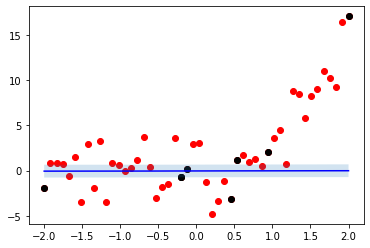

  1%|          | 91/10000 [00:00<07:38, 21.61it/s]

Mean loss at epoch 100 : 2.946833610534668
 Validation loss after 100 equals                     3.6520090103149414


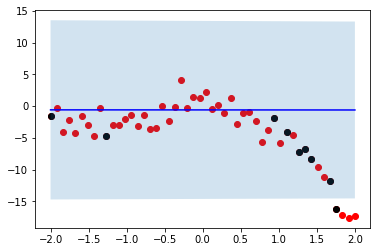

  2%|▏         | 184/10000 [00:01<02:29, 65.59it/s]

Mean loss at epoch 200 : 3.0965042114257812
 Validation loss after 200 equals                     3.7261526584625244


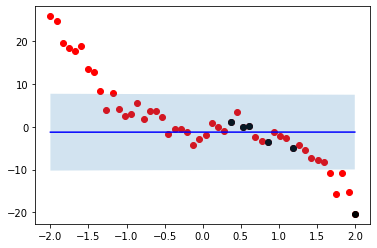

  3%|▎         | 300/10000 [00:01<01:05, 148.64it/s]

Mean loss at epoch 300 : 3.6237542629241943
 Validation loss after 300 equals                     2.81601619720459


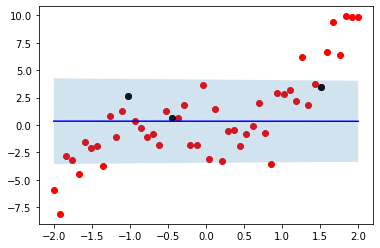

  4%|▍         | 395/10000 [00:02<00:54, 177.85it/s]

Mean loss at epoch 400 : 3.1924118995666504
 Validation loss after 400 equals                     3.1697542667388916


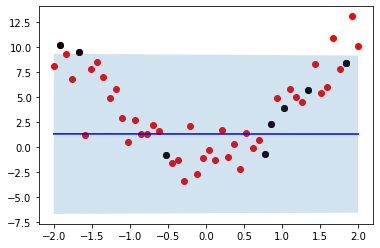

  4%|▍         | 408/10000 [00:02<01:02, 152.51it/s]


KeyboardInterrupt: 

In [53]:
model_weights = trainer.run_training(**default_conf['multiple_functions']['training_params'])



## Using different datapoints from the same function

In [8]:
trainer = RegressionTrainer(**default_conf['single_function']['experiment_params'])

  0%|          | 0/100000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 42.07260513305664
 Validation loss after 0 equals                     25.09590435028076


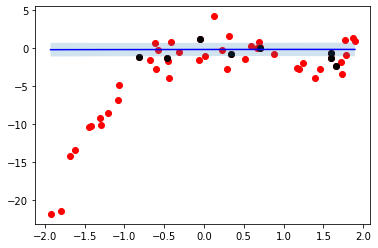

  1%|          | 997/100000 [00:37<48:34, 33.96it/s]  

Mean loss at epoch 1000 : 3.2434024810791016
 Validation loss after 1000 equals                     3.1489497423171997


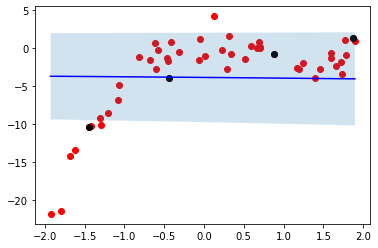

  2%|▏         | 1999/100000 [01:12<45:08, 36.18it/s]  

Mean loss at epoch 2000 : 3.2453818321228027
 Validation loss after 2000 equals                     3.126692056655884


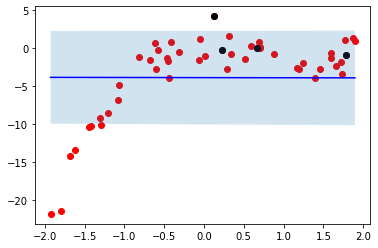

  3%|▎         | 2997/100000 [01:44<1:14:22, 21.74it/s]

Mean loss at epoch 3000 : 3.2412726879119873
 Validation loss after 3000 equals                     3.107571244239807


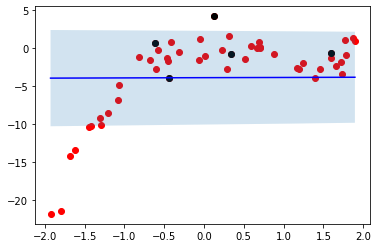

  4%|▍         | 3998/100000 [02:13<45:18, 35.32it/s]  

Mean loss at epoch 4000 : 3.2385406494140625
 Validation loss after 4000 equals                     3.1077094078063965


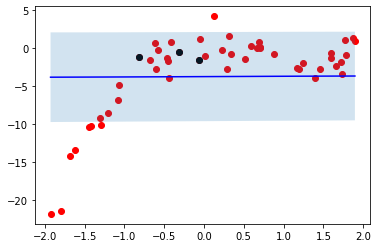

  5%|▍         | 4997/100000 [02:44<49:04, 32.26it/s]  

Mean loss at epoch 5000 : 3.240851402282715
 Validation loss after 5000 equals                     3.1302608251571655


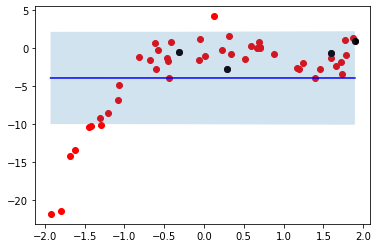

  5%|▌         | 5417/100000 [03:00<52:32, 30.01it/s]  


KeyboardInterrupt: 

In [9]:
model_weights = trainer.run_training(**default_conf['single_function']['training_params'])


In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
dataset = pd.read_csv(
    default_conf['single_function']['training_params']['kwargs']['data_path'])

In [55]:
train, test = train_test_split(dataset,test_size=0.33)
train,test = train.reset_index(drop=True), test.reset_index(drop=True)
idx = np.random.randint(0, len(X_train),50)
X_train, y_train = train['x'][idx], train['target'][idx]
X_test, y_test = test['x'], test['target']

X_train = X_train[:,None]
X_test = X_test[:,None]

In [56]:
model = GaussianProcessRegressor()

In [57]:
model.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [58]:
y_pred = model.predict(X_test)

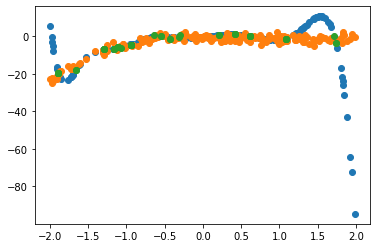

In [59]:
plt.scatter(X_test,y_pred)
plt.scatter(X_test,y_test)
plt.scatter(X_train, y_train)